In [1]:
import seaborn as sns
from alphaanalysis.plot.gam import get_sig_intervals
from matplotlib import pyplot as plt

# Data Base

In [ ]:
from IPython.display import clear_output

from djimaging.user.alpha.schemas.alpha_schema import *
from djimaging.user.alpha.utils import database

indicator = 'calcium'
database.connect_dj(indicator=indicator)
clear_output()

# Data Frame

In [ ]:
roi_tab = database.get_roi_tab(quality_filter=True)

chirp_tab = (
        ChirpSurroundIndex.proj(lg_surround_index='chirp_surround_index') *
        FieldPosMetrics.RoiPosMetrics.proj(soma_dist='d_dist_to_soma') *
        RetinalFieldLocationWing.proj(group="wing_side")
) & roi_tab.proj()

df = chirp_tab.fetch(format='frame')
df = df.reset_index()
df = df.sample(frac=1)

In [4]:
import utils

df = utils.prep_df(df)
df

,experimenter,date,exp_num,field,lChirp,cond1,roi_id,gChirp,lg_surround_index,soma_dist,group,cell_id,field_id
490,Ran,2020-06-21,1,d5,lChirp,control,1,gChirp,0.283760,37.0071,n,2020-06-21_1,2020-06-21_1_d5
163,Ran,2020-05-11,1,d1,lChirp,control,15,gChirp,-0.563008,41.9533,t,2020-05-11_1,2020-05-11_1_d1
679,Ran,2020-08-23,1,d3,lChirp,control,2,gChirp,-1.363420,177.8750,t,2020-08-23_1,2020-08-23_1_d3
9,Ran,2018-06-10,1,D2,lChirp,control,3,gChirp,-1.446800,28.7290,d,2018-06-10_1,2018-06-10_1_D2
617,Ran,2020-07-13,1,d3,lChirp,control,10,gChirp,0.309963,174.5960,t,2020-07-13_1,2020-07-13_1_d3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Ran,2020-08-24,2,d4,lChirp,control,1,gChirp,-0.582424,120.0660,t,2020-08-24_2,2020-08-24_2_d4
511,Ran,2020-07-05,2,d2,lChirp,control,5,gChirp,-0.685780,186.7890,d,2020-07-05_2,2020-07-05_2_d2
358,Ran,2020-06-08,1,d1,lChirp,control,10,gChirp,0.796274,158.6210,n,2020-06-08_1,2020-06-08_1_d1
113,Ran,2020-05-10,1,d7,lChirp,control,10,gChirp,-1.493030,51.0872,d,2020-05-10_1,2020-05-10_1_d7


# Plot

In [5]:
from alphaanalysis import plot as plota

plota.set_rc_params()

In [6]:
order = plota.get_order(indicator=indicator)
palette = plota.get_palette(indicator=indicator)
colors = [palette[group] for group in order]

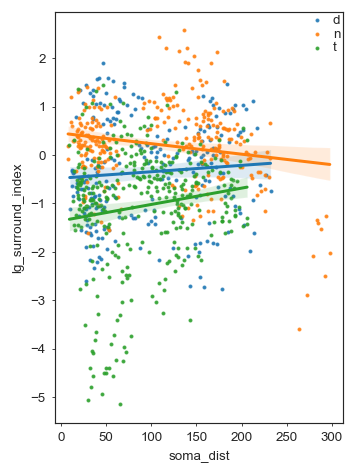

In [7]:
utils.plot_scatter_metrics(df, ['lg_surround_index'], groupby='group')

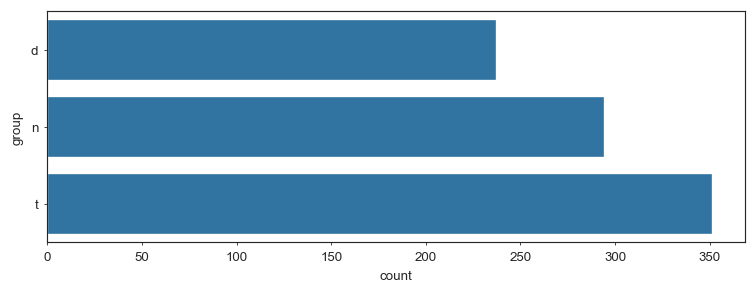

In [8]:
sns.countplot(data=df, y="group");

# Fit GAM

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
#noqa

rm(list=ls())

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


## R imports

In [11]:
%%R
#noqa

library("IRdisplay")
library("dplyr")
library('parallel')
library('ggplot2')
library("nlme")
library("mgcv")
library("ggthemes")
library("itsadug")
library("png")
library("xtable")
library("tidymv")
library("cowplot")
library("qgam")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.
Loading required package: plotfunctions

Attaching package: ‘plotfunctions’

The following object is masked from ‘package:ggplot2’:

    alpha

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Attaching package: ‘xtable’

The following object is masked from ‘package:IRdisplay’:

    display

tidymv has been superseded by tidygam. The package tidymv is no longer maintained but will be
    kept on CRAN to ensure reproducibility of older analyses. Users should
    use the replacement package tidygam for new analyses, which is available on
    CRAN and GitHub (https://github.com/stefanocoretta/tidygam).

Attaching package: ‘tidymv’

Th

# Import R df

In [12]:
%%R -i df
#noqa

df$group <- factor(df$group)
df$cell_id <- factor(df$cell_id)
df$field_id <- factor(df$field_id)

df <- df[df$soma_dist <= 200,]

head(df)

    experimenter   date exp_num field lChirp   cond1 roi_id gChirp
490          Ran 737597       1    d5 lChirp control      1 gChirp
163          Ran 737556       1    d1 lChirp control     15 gChirp
679          Ran 737660       1    d3 lChirp control      2 gChirp
9            Ran 736855       1    D2 lChirp control      3 gChirp
617          Ran 737619       1    d3 lChirp control     10 gChirp
231          Ran 737556       2    d1 lChirp control      4 gChirp
    lg_surround_index soma_dist group      cell_id        field_id
490          0.283760   37.0071     n 2020-06-21_1 2020-06-21_1_d5
163         -0.563008   41.9533     t 2020-05-11_1 2020-05-11_1_d1
679         -1.363420  177.8750     t 2020-08-23_1 2020-08-23_1_d3
9           -1.446800   28.7290     d 2018-06-10_1 2018-06-10_1_D2
617          0.309963  174.5960     t 2020-07-13_1 2020-07-13_1_d3
231         -0.690690   18.9898     t 2020-05-11_2 2020-05-11_2_d1


## Helper functions

In [13]:
%%R
#noqa

display_model <- function(m){
    print(summary(m));
    tabs <- capture.output(gamtabs(m, type="HTML"));
    display_html(tabs);
}

## Plot raw data

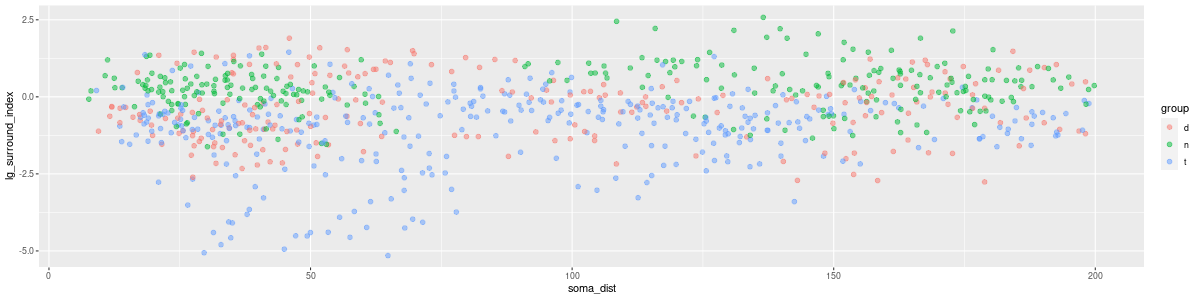

In [14]:
%%R -w 1200 -h 300
#noqa

p1 <- ggplot(aes(x=soma_dist, y=lg_surround_index, color=group), data=df) +
    geom_point(alpha=.5, size=2)

plot(plot_grid(p1, ncol=1))

# GAMs

## response_lg_surround lower

In [15]:
%%R
#noqa

m1a_lg <- gam(lg_surround_index ~ group + s(soma_dist, k=8, bs="cr"), data=df)
m2a_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr"), data=df)
m3a_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df)
m3b_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df, family=scat)
m4a_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df)
m4b_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df, family=scat)
m5a_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df)
m5b_lg <- gam(lg_surround_index ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df, family=scat)

In [16]:
%%R
#noqa

BIC(m1a_lg, m2a_lg, m3a_lg, m3b_lg, m4a_lg, m4b_lg, m5a_lg, m5b_lg)

              df      BIC
m1a_lg  9.052247 2473.844
m2a_lg 18.752010 2498.241
m3a_lg 29.127797 2160.500
m3b_lg 32.326375 2131.699
m4a_lg 31.606235 2171.917
m4b_lg 33.158762 2136.205
m5a_lg 31.621191 2171.913
m5b_lg 33.357571 2137.464


In [17]:
%%R
#noqa

anova(m1a_lg, m2a_lg, m3a_lg, m4a_lg, m5a_lg, test="F")

Analysis of Deviance Table

Model 1: lg_surround_index ~ group + s(soma_dist, k = 8, bs = "cr")
Model 2: lg_surround_index ~ group + s(soma_dist, by = group, k = 8, bs = "cr")
Model 3: lg_surround_index ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + 
    s(cell_id, bs = "re")
Model 4: lg_surround_index ~ group + s(soma_dist, by = group, k = 12, 
    bs = "cr") + s(cell_id, bs = "re")
Model 5: lg_surround_index ~ group + s(soma_dist, by = group, k = 16, 
    bs = "cr") + s(cell_id, bs = "re")
  Resid. Df Resid. Dev       Df Deviance       F    Pr(>F)    
1    826.11     879.46                                        
2    814.84     837.46 11.27641    42.00  5.8654 2.232e-09 ***
3    804.07     514.04 10.77239   323.42 47.2836 < 2.2e-16 ***
4    800.71     510.81  3.35138     3.23  1.5160    0.2043    
5    800.50     510.75  0.21401     0.06  0.4704    0.2381    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Family: Scaled t(3.358,0.565) 
Link function: identity 

Formula:
lg_surround_index ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + 
    s(cell_id, bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.3788     0.3199  -1.184    0.236
groupn        0.6347     0.4335   1.464    0.143
groupt       -0.6086     0.4326  -1.407    0.160

Approximate significance of smooth terms:
                       edf Ref.df Chi.sq  p-value    
s(soma_dist):groupd  3.386  4.161  25.37 6.24e-05 ***
s(soma_dist):groupn  4.000  4.814  14.89    0.015 *  
s(soma_dist):groupt  3.595  4.363  25.07 7.53e-05 ***
s(cell_id)          13.680 14.000 602.63  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.527   Deviance explained = 43.1%
-REML = 1014.9  Scale est. = 1         n = 835

Method: REML   Optimizer: outer newton
full convergence after 6 iterations.
Gradient range [-0.003923711,0.0003864115]
(score 1014.9 

In addition: Warning message:
In getOption("jupyter.base_display_func")(data, metadata) :
  IRdisplay can only be used from the IPython R kernel and R magic.


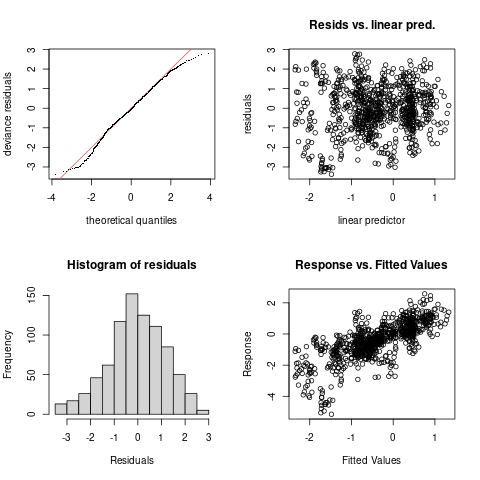

In [18]:
%%R
#noqa

m_lg <- m3b_lg
display_model(m_lg)
gam.check(m_lg)

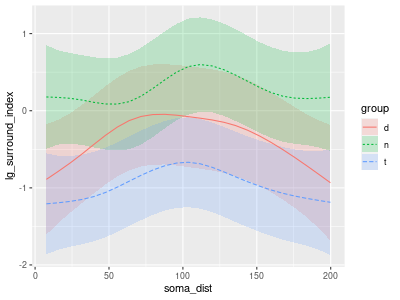

In [19]:
%%R -w 400 -h 300
#noqa

p1 <- plot_smooths(model=m_lg, series=soma_dist, comparison=group)
plot(p1, ylim=c(0, 60))

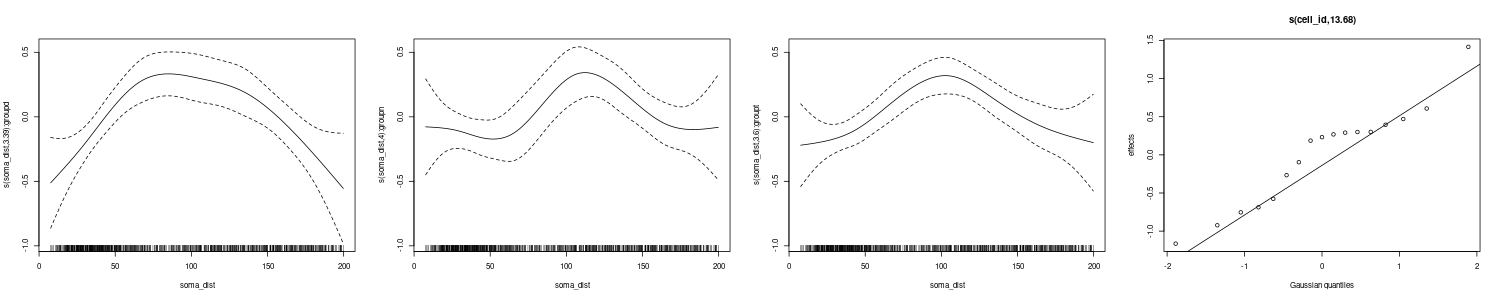

In [20]:
%%R -w 1500 -h 300
#noqa

par(mfrow=c(1, 4))
plot(m_lg)

### Plot fits

In [21]:
%%R
#noqa

r_df_pred_lg = predict_gam(m_lg, exclude_terms=s(cell_id, bs="re"))
head(r_df_pred_lg)

# A tibble: 6 × 5
  group soma_dist cell_id         fit se.fit
  <fct>     <dbl> <fct>         <dbl>  <dbl>
1 d          7.62 2018-06-10_1 -0.890  0.365
2 n          7.62 2018-06-10_1  0.178  0.343
3 t          7.62 2018-06-10_1 -1.21   0.334
4 d         11.5  2018-06-10_1 -0.840  0.352
5 n         11.5  2018-06-10_1  0.176  0.325
6 t         11.5  2018-06-10_1 -1.20   0.321


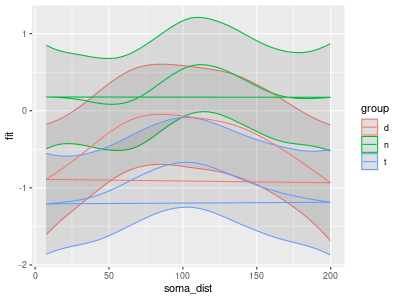

In [22]:
%%R -w 400 -h 300
#noqa

predict_gam(m_lg, exclude_terms=s(cell_id, bs="re")) %>%
ggplot(aes(soma_dist, fit, col=group)) +
geom_smooth_ci()

### Plot differences 

[1] 2.39398
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 7.623390 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

Difference is not significant.
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 7.623390 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

soma_dist window(s) of significant difference(s):
	7.623390 - 61.974391
	79.444355 - 199.793000
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 7.623390 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

Difference is not sig

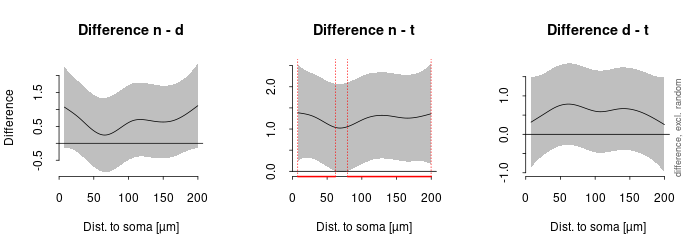

In [23]:
%%R -w 700 -h 250 -o nd_diff_lg -o nt_diff_lg -o dt_diff_lg
#noqa

n_diffs <- 3
par(mfrow=c(1, n_diffs), cex=1.0, tcl=-0.2)

se <- qnorm((100 - (2.5 / n_diffs)) / 100)
print(se)
ylim <- NULL  #c(-150, 150)
ylab <- 'Difference'
xlab <- 'Dist. to soma [µm]'

nd_diff_lg <- plot_diff(m_lg, view="soma_dist", comp=list(group=c("n", "d")), se=se, ylab=ylab, xlab=xlab, ylim=ylim,
                         hide.label = TRUE)
nt_diff_lg <- plot_diff(m_lg, view="soma_dist", comp=list(group=c("n", "t")), se=se, ylab='', xlab=xlab, ylim=ylim,
                         hide.label = TRUE)
dt_diff_lg <- plot_diff(m_lg, view="soma_dist", comp=list(group=c("d", "t")), se=se, ylab='', xlab=xlab, ylim=ylim)

In [24]:
pairs_sig_regions_lg = [
    ("n vs. d", get_sig_intervals(nd_diff_lg)),
    ("n vs. t", get_sig_intervals(nt_diff_lg)),
    ("d vs. t", get_sig_intervals(dt_diff_lg)),
]
pairs_sig_regions_lg

[]
[]
[ 0 28 36 99]
[]
[]
[]


[('n vs. d', []),
 ('n vs. t', [(7.62339, 61.97439080808081), (77.50324818181818, 199.793)]),
 ('d vs. t', [])]

# Go back to python for easy plotting

In [25]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
    df_pred_lg = ro.conversion.rpy2py(ro.globalenv['r_df_pred_lg'])

(2.5, 2.0)


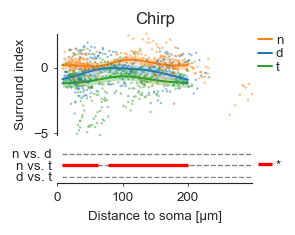

In [26]:
fig, axs = utils.plot_fits(
    df=df,
    df_preds=[df_pred_lg],
    pairs_sig_regions_list=[pairs_sig_regions_lg],
    titles=[None],
    ys=['lg_surround_index'],
    ylabels=['Surround index'],
    x='soma_dist',
    xlabel='Distance to soma [µm]',
    order=order, colors=colors,
    figsize=(2.5, 2.0), ms=2, ma=0.5,
)

axs[0].set_title("Chirp")
plt.tight_layout()
plt.savefig(f'figures/{indicator}_soma_dist_chirp_surround.pdf')
plt.show()